In [1]:
from keras.layers import Dense, MaxPooling2D

from keras.models import Sequential

from keras.datasets import mnist

 

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Homework try to use 2D layers, 

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) =  mnist.load_data()

In [3]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

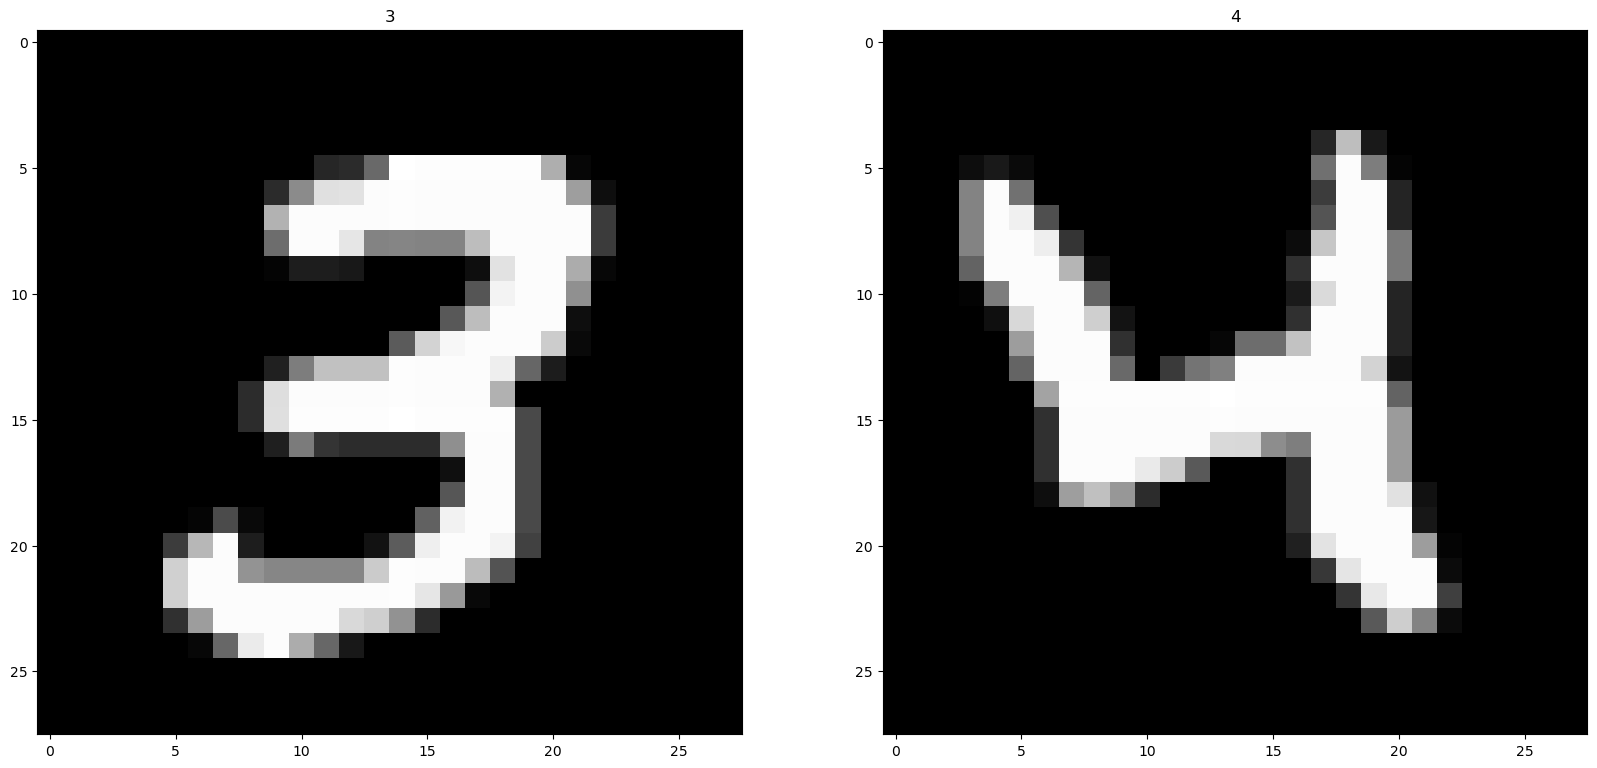

In [4]:
figure, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.imshow(train_imgs[7,:,:], cmap = 'gray')
ax1.set_title(train_labels[7])

ax2.imshow(train_imgs[20,:,:], cmap = 'gray')
ax2.set_title(train_labels[20])

plt.show()

In [5]:
print(train_imgs.shape[0])

60000


In [6]:
print(test_imgs.shape[0])

10000


In [7]:
train_imgs.shape[1:]

(28, 28)

In [46]:
train_imgs.shape

(60000, 28, 28)

we haven 6000 handwriten images and 10 classes, the numbers from 1 to 10

In [47]:
len(train_labels)

60000

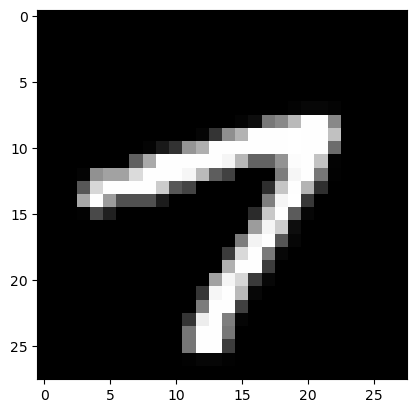

In [50]:
plt.imshow(train_imgs[101,:,:], cmap = 'gray')
plt.show()

In [10]:
train_labels[101]

7

In [11]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [51]:
dim_array = np.prod(train_imgs.shape[1:])

In [52]:
train_data = train_imgs.reshape(train_imgs.shape[0], dim_array)

train_data.shape

(60000, 784)

In [12]:
np.prod(train_imgs.shape[1:])

784

In [13]:
dim_array = np.prod(train_imgs.shape[1:])

In [14]:
train_data = train_imgs.reshape(train_imgs.shape[0], dim_array)
train_data.shape

(60000, 784)

instead of 3 dimention tensors we do 2 dimension, the first dimensions doesnt change 
we flatten the images from 28,28 to 784
60000 for training and 784 to test  

In [15]:
train_data 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
test_data = test_imgs.reshape(test_imgs.shape[0], dim_array)
test_data 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Scale two matrices between 0 to 1, between 0 to 255 0 is black white is 255

In [17]:
test_data.min()

0

In [18]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255 #train_data = train_data / 255
test_data /= 255

convert train and test in the same labels 

In [19]:
from tensorflow.keras.utils import to_categorical

one hot codding transform the input into 0 or 1, 0 everywhere appart to the correspond position. Transform every label into the vector of the size 10 into 0 and 1 

In [20]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [21]:
train_labels[5]

2

In [22]:
train_labels_one_hot[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

loss to minimize the probabilities, the probability is calculate by the softtmax. 
loss function in the logistic regression is the logloss 

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [24]:
df = pd.DataFrame({'digits': ["1", "2","3"]})

In [25]:
df

,digits
0,1
1,2
2,3


In [26]:
enc = OneHotEncoder()
enc.fit(df[['digits']])

OneHotEncoder()

In [27]:
pd.DataFrame(columns = enc.get_feature_names_out(),
             data = enc.transform(df[['digits']]).toarray())

,digits_1,digits_2,digits_3
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [28]:
num_classes = len(np.unique(train_labels))
print(num_classes)

10


In [29]:
dim_array

784

[0,0,1,...0,0]

[0,0,0.9,0.01...]

In [30]:
model = Sequential()
model.add(Dense(512, activation = 'sigmoid', input_shape = (dim_array,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
# mod.fit(X,y)

In [33]:
history = model.fit(train_data,
          train_labels_one_hot,
          batch_size = 256,
          epochs = 20,
          verbose = 1,
          validation_data = (test_data , test_labels_one_hot))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5825 - loss: 1.3365 - val_accuracy: 0.9026 - val_loss: 0.3357
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8987 - loss: 0.3386 - val_accuracy: 0.9196 - val_loss: 0.2724
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9174 - loss: 0.2759 - val_accuracy: 0.9203 - val_loss: 0.2600
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9317 - loss: 0.2278 - val_accuracy: 0.9367 - val_loss: 0.2089
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9407 - loss: 0.1971 - val_accuracy: 0.9493 - val_loss: 0.1712
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9516 - loss: 0.1654 - val_accuracy: 0.9521 - val_loss: 0.1591
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9565 - loss: 0.1480 - val_accuracy: 0.9442 - val_loss: 0.1801
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9617 - loss: 0.1310 - val_accuracy: 0.

Evaluate the model

In [34]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

print(f'Loss = {test_loss}, Accuracy = {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9701 - loss: 0.1005
Loss = 0.08301696926355362, Accuracy = 0.9751999974250793


Plot the results of the history 

In [53]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plot the Loss. The error should be 0 for this reazon we minimize with the loss function. 

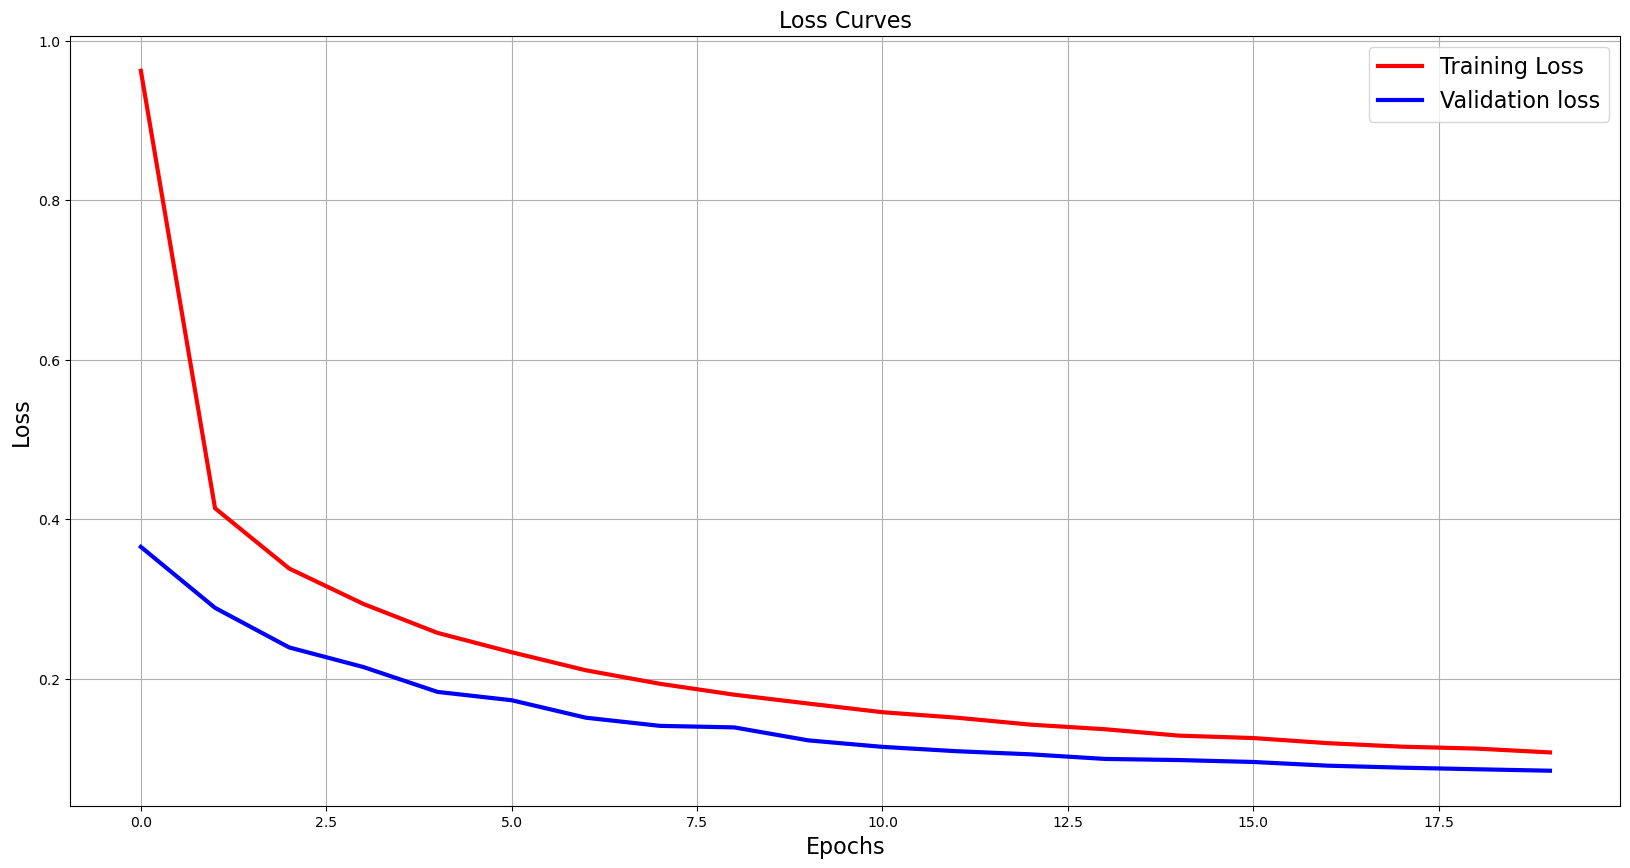

In [54]:
plt.figure(figsize = (20,10))
plt.plot(history.history['loss'],'r', linewidth = 3.0, label = 'Training Loss')
plt.plot(history.history['val_loss'],'b', linewidth = 3.0, label = 'Validation loss')
plt.legend(fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)
plt.title('Loss Curves', fontsize= 16)
plt.grid()
plt.show()

Plot the accuracy. The accuracy should be high for this reazon we select the hghest accuracy 

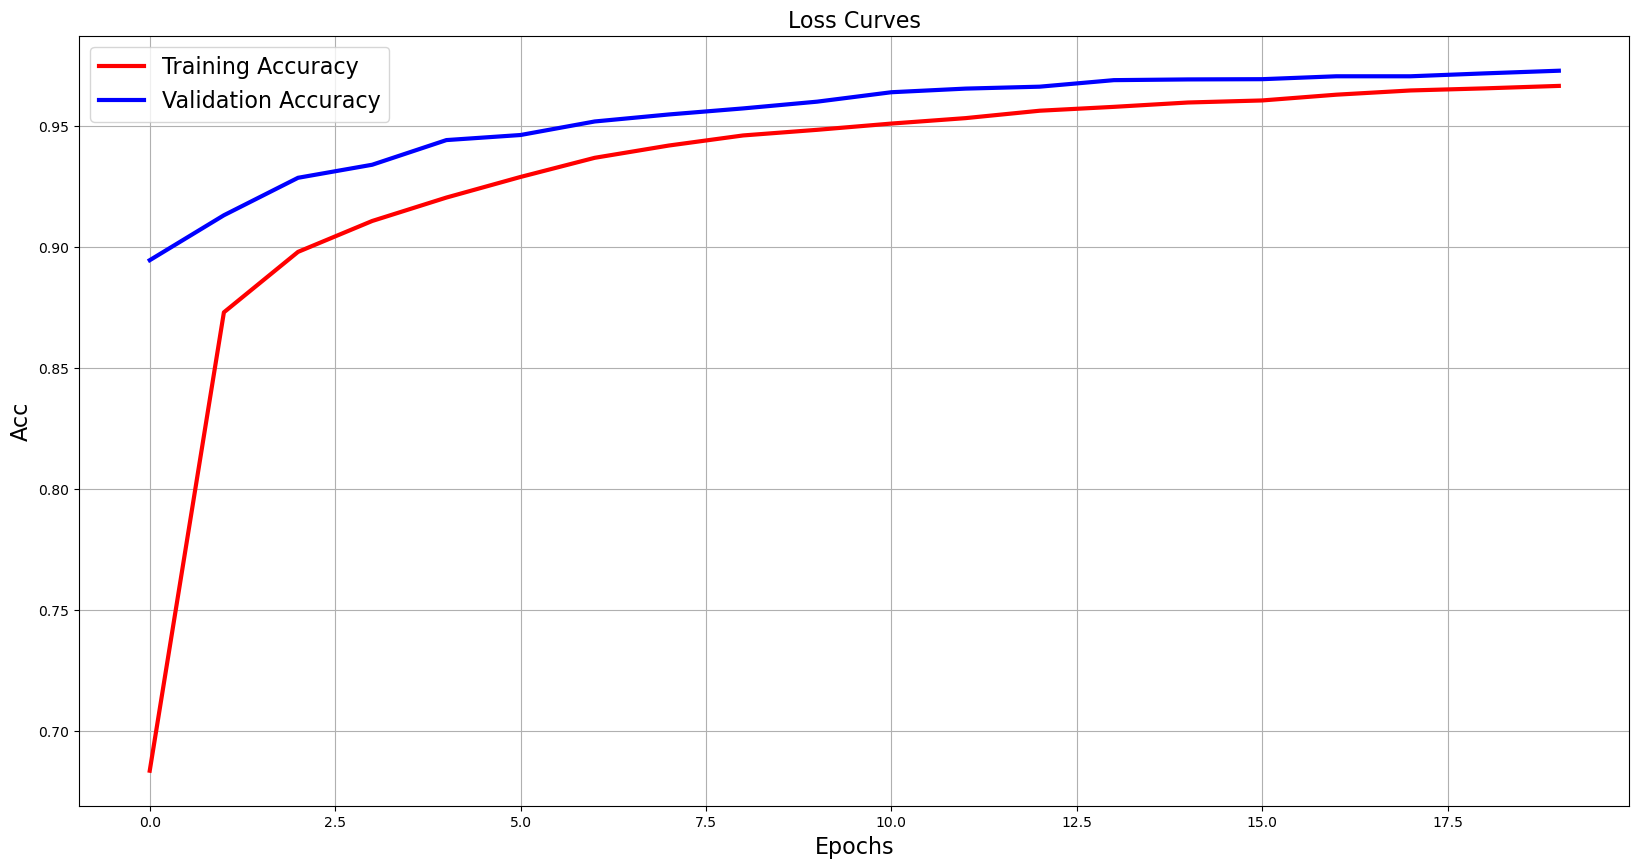

In [55]:
plt.figure(figsize = (20,10))
plt.plot(history.history['accuracy'],'r', linewidth = 3.0, label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],'b', linewidth = 3.0, label = 'Validation Accuracy')
plt.legend(fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Acc', fontsize = 16)
plt.title('Loss Curves', fontsize= 16)
plt.grid()
plt.show()

In [56]:
test_labels[8]

5

this are the probabilities :

In [57]:
model.predict(test_data[[8],:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[5.7983558e-05, 2.3273553e-05, 9.7123826e-05, 6.0411975e-07,
        9.5602922e-04, 2.3216884e-01, 7.6572329e-01, 1.1226825e-09,
        7.9829345e-04, 1.7446195e-04]], dtype=float32)

In [58]:
np.array([0.1,0.8,0.1]).argmax()

1

Drop out layers, when we have overfitting this means we will start to train new nodes, to hope to get better accuracy to the train set 

In [59]:
from keras.layers import Dropout

In [60]:
model = Sequential()
model.add(Dense(512, activation = 'sigmoid', input_shape = (dim_array,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Fit the model 

In [62]:
history = model.fit(train_data,
          train_labels_one_hot,
          batch_size = 256,
          epochs = 20,
          verbose = 1,
          validation_data = (test_data , test_labels_one_hot))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6619 - loss: 1.0615 - val_accuracy: 0.4000 - val_loss: 1.4965
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8866 - loss: 0.3686 - val_accuracy: 0.3878 - val_loss: 1.5090
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9055 - loss: 0.3071 - val_accuracy: 0.4603 - val_loss: 1.5310
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9186 - loss: 0.2677 - val_accuracy: 0.4908 - val_loss: 1.4078
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9274 - loss: 0.2378 - val_accuracy: 0.4887 - val_loss: 1.4749
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9318 - loss: 0.2236 - val_accuracy: 0.3938 - val_loss: 1.6205
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9373 - loss: 0.2066 - val_accuracy: 0.5194 - val_loss: 1.4413
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9408 - loss: 0.1957 - val_accuracy: 0.

We reduce the Gap 

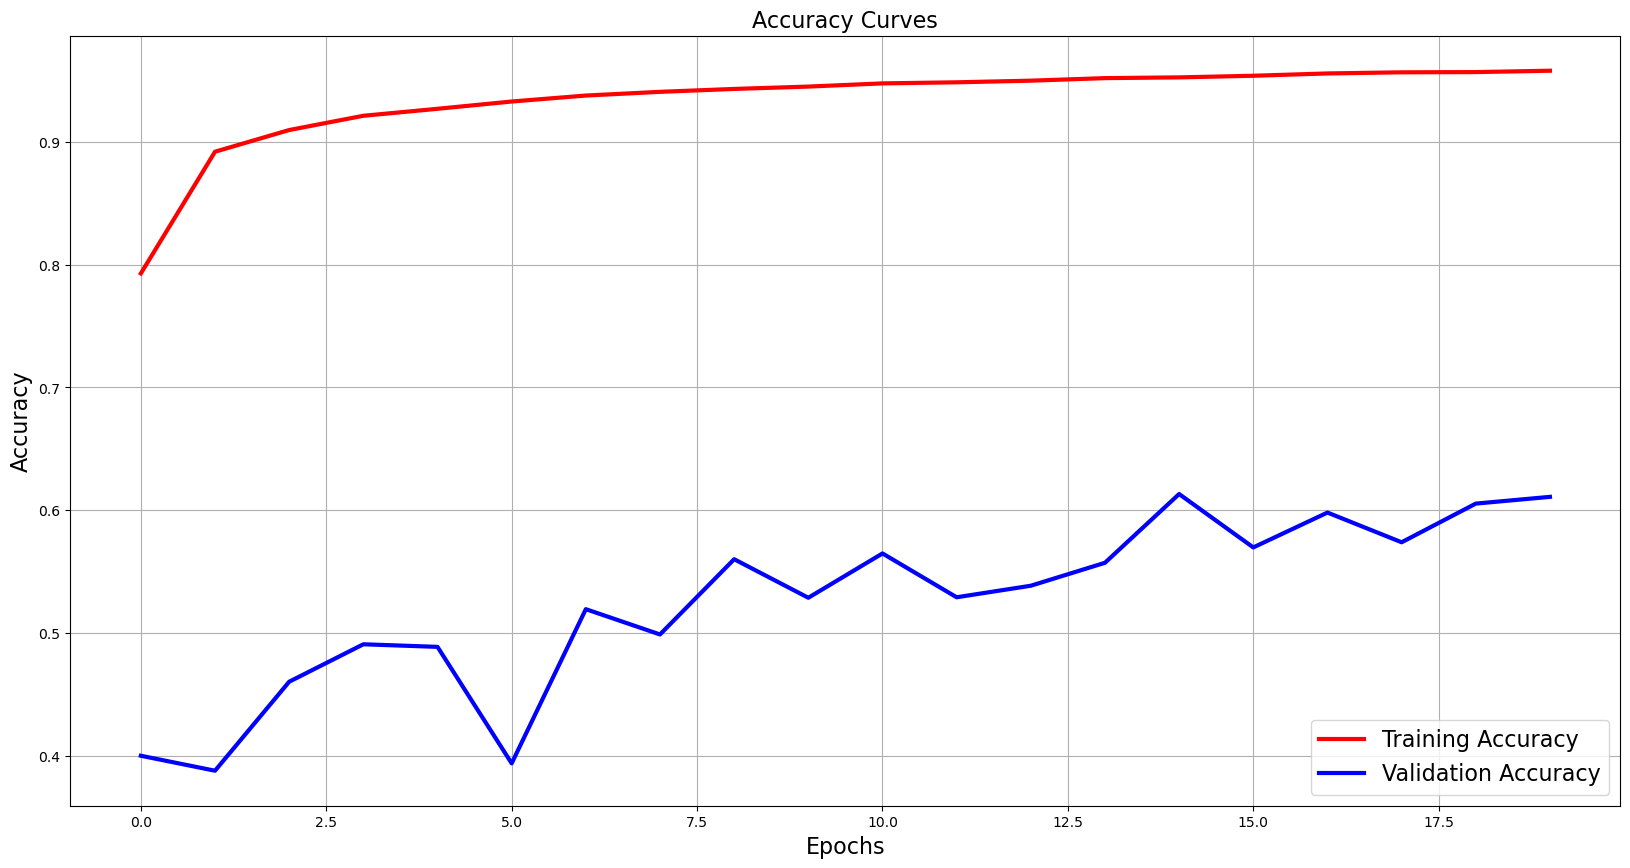

In [63]:
plt.figure(figsize = (20,10))
plt.plot(history.history['accuracy'],'r', linewidth = 3.0, label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'],'b', linewidth = 3.0, label = 'Validation Accuracy')
plt.legend(fontsize = 16)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy Curves', fontsize= 16)
plt.grid()
plt.show()

Dataset grayscale to images 
